## Scientific Computing Coursework EMAT30008

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ExampleFunctions import *
from ODEsolver import error_difference, solve_odes

Ordinary Differential Equation solver
-------------------------------------
The purpose of this software is to iteratively solve an ordinary differential equation (ODE) or system of ODEs using either the Euler method or the fourth order Runge-Kutta (RK4) method. The code uses three functions to achieve this, `euler_step`, `RK4_step` and `solve_odes`. The `solve_odes` function uses a for loop to iterate through time steps where the solution to the ODE is approximated with increasing accuracy by `RK4_step` and `Euler_step`. `Solve_odes` allows the user to input any combination of starting values, step size, method and nescessary constants to solve any ODE system. 

The graphs below display the error of the Euler and RK4 methods with increasing timesteps when applied to the ODE $f'(x) = x$ (eulers constant), using np.exp to generate the true values and calculate the error. The Euler and RK4 methods have a similar error value when the timestep is 0.01 and 1, respectively. The RK4 error is persistently several orders of magnitude below the Euler error. This is expected as the RK4 method is a fourth order method which results in smaller truncation errors. For this reason, the `solve_odes` function uses the RK4 method as default. 

The use of \*\*kwargs is nescessary to input any number of additional keyword arguments, it ensures the function is flexible such that it can solve any ODE system. The reason I used \*\*kwargs instead of *args is that it is simple to add or remove arguments without having to worry about their order or position.

The function also uses ValueError's to ensure graceful error handling. The use of ValueError's prevent the program from crashing or producing unexpected results. The flagged error message also provides more infomation on the specific issue resulting in faster debugging.

Due to computation costs, I only completed this for a small range of evaluation points. To test for truncation and global errors, it would be worthwhile to increase the range of solutions and use a larger amount of evaluation points. While there are other one step integrators available, the RK4 method provides good accuracy for the computation cost, and the euler method is fast but tends to compromise accuracy. Between the two, I deemed I had a good balance depending on the needs of the problem.

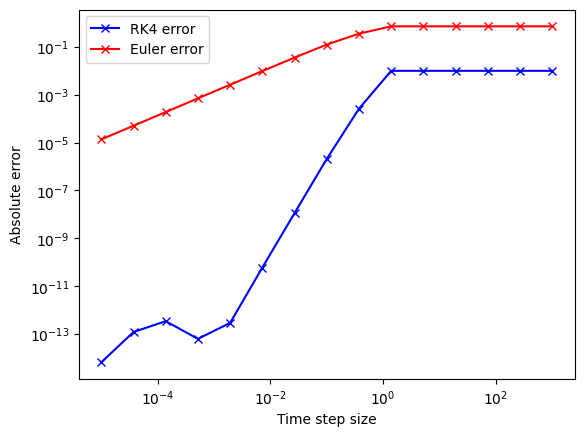

In [2]:
pars = 1
error_difference(euler_number, x0=1, t0=0, t1=1, true_solution = true_euler_number, pars = pars)

`Perf_counter()` can be used to calculate the time difference between these two methods. As expected, the RK4 method takes longer than the Euler method. 

In [3]:
import time

start_timeEuler = time.perf_counter()
ansEuler, tEuler = solve_odes(euler_number, x0=1, t0=0, t1=100, dt_max=0.01, solver = 'euler')
end_timeEuler = time.perf_counter()

start_timeRK4 = time.perf_counter()
ansRK4, tRK4 = solve_odes(euler_number, x0=1, t0=0, t1=100, dt_max=0.01, solver = 'rk4')
end_timeRK4 = time.perf_counter()

print('Time taken for the Euler method:', abs(end_timeEuler-start_timeEuler)) 
print('Time taken for the RK4 method:', abs(end_timeRK4-start_timeRK4))

Time taken for the Euler method: 0.07511110001360066
Time taken for the RK4 method: 0.11736560001736507


Using a large value of dt_max to solve $f''(x) = - x$ produces a solution that degrades in accuracy over time. Error's in the solution compound over time since the next solution is calculated with the previous. 

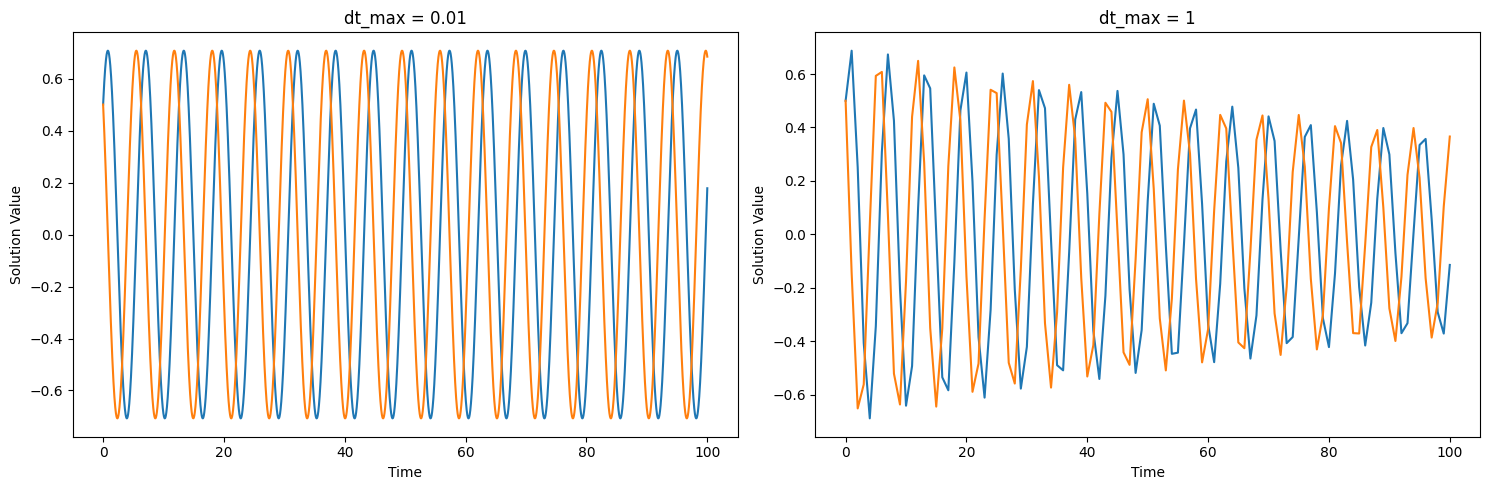

In [4]:
from ODEsolver import plotter

sol, t = solve_odes(func2, x0=[0.5,0.5], t0=0, t1=100, dt_max=0.01)
sol1, t1 = solve_odes(func2, x0=[0.5,0.5], t0=0, t1=100, dt_max=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plotter(t, sol, '-', 'Time', 'Solution Value', 'dt_max = 0.01', ax1)
plotter(t1, sol1, '-', 'Time', 'Solution Value', 'dt_max = 1', ax2)
plt.tight_layout()
plt.show()

Numerical Shooting
------------------
The numerical shooting software, solves boundary value ODE problems, using my numerical integrator `solve_odes` and the numerical root finder `fsolve`. The shooting function is implemented through the use of `find_shoot_orbit`, which is simple to use and performs both the shooting and root finding steps. `Find_shoot_orbit` requires a phase condition which defaults to $\frac{dx}{dt}(0) = 0$, as there is at least one point in the limit cycle where $\frac{dx}{dt}(0)$ is true, though other phase conditons may also be specified. `Find_shoot_orbit` returns the inital conditions and time period of the periodic orbit of the ODE system. The `plot_phase_portrait` function provides a way to visually inspect the behavior of the system. This helps to understand the dynamics of the system and also serves as a debugging tool.

To check the results of the shooting function and provide initial guesses, `iso_orbit` finds the limit cycle initial conditions and time period for a system of ODEs using squared euclidean distance to check for repeated peaks in the solution. I used squared Euclidean as the distance metric because it is widely accepted and computationally effecient.

ValueErrors streamline the code as before. I chose to use fsolve because it is an effecient and general-purpose solver. In future it could be worth implementing other root finding methods such as a bisection method to increase computational effeciency if the desired accuracy is low. Additionally, interactive time-stepping, where the step size is adjusted based on the local behaviour of the solution could also speed up convergence without compromising accuracy, though I found this difficult to implement.  

The graphs below demonstrate my `plot_different_parameters` function, visualising the predator-prey equation with different parameters.In the predator-prey function, when b is less than 0.25, the populations oscillate periodically for infinite time, whereas when b is greater than 0.25, the populations reach a stable equilibrium. 

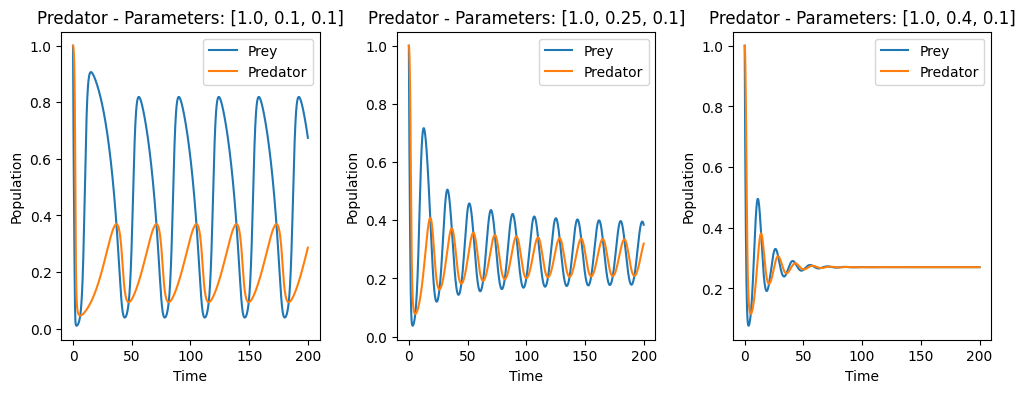

In [5]:
from ODEsolver import plot_different_parameters

params = [[1.0, 0.1, 0.1], [1.0, 0.25, 0.1], [1.0, 0.4, 0.1]]
plot_different_parameters(predator_prey, x0=[1,1], t0=0, t1=200, dt_max=0.01, params=params)

Isolating a periodic orbit from the predator prey equation using `iso_orbit` and comparing to the orbit found by shooting.

In [6]:
from NumericalShooting import iso_orbit, find_shoot_orbit, code_testing

pars = [1.0, 0.2, 0.1]
orbit = iso_orbit(predator_prey, x0=[1,1], t0=0, t1=500, dt_max=0.01, pars=pars)
print('The true values of the predator prey orbit:', orbit)

u0T = [0.8, 0.2, 16]
shooting_orbit = find_shoot_orbit(predator_prey, u0T, pars)
print('The shooting values of the predator prey orbit: ', shooting_orbit)

The true values of the predator prey orbit: [0.5794930512336863, 0.2858000660212782, 20.859999999999992]
The shooting values of the predator prey orbit:  [ 0.57787148  0.28614888 20.81686658]


To further test my code, I experimented with the three dimensional hopf system:

\begin{equation}
    \frac{du_1}{dt} = \beta u_1 - u_2 + \sigma u_1(u_1^2 + u_2^2)
\end{equation}

\begin{equation}
    \frac{du_2}{dt} = u_1 + \beta u_2 + \sigma u_2(u_1^2 + u_2^2)
\end{equation}

\begin{equation}
    \frac{du_3}{dt} = -u_3 
\end{equation}

When $\sigma = 1$ this system undergoes a supercritical hopf bifurcation. I also created a `code_testing` function which checks the results are accurate according to a defined tolerance level. The shooting results are equivalent to the results found by `iso_orbit` when using a tolerance of $1e^{-2}$. 

In [7]:
#Testing the shooting code using the three dimensional hopf system
pars = [0.3, -1]
orbit = iso_orbit(three_dim_hopf, [1,1,1], 0, 200, 0.01, pars=pars)
print('The true values of the three dim hopf orbit:', orbit)

# Using the true values from before to provide an initial guess
u0T = [0.6, 0.0, 0.0, 6]
shooting_orbit = find_shoot_orbit(three_dim_hopf, u0T, pars)
print('The shooting values of the three dim hopf orbit: ', shooting_orbit)

code_testing(three_dim_hopf, x0 = [1,1,1], pars=pars, u0T=u0T, atol=1e-2)
code_testing(three_dim_hopf, x0 = [1,1,1], pars=pars, u0T=u0T, atol=1e-3)

The true values of the three dim hopf orbit: [0.5477224040648941, -0.002277311103616923, 1.4343054792543768e-08, 6.279999999999999]
The shooting values of the three dim hopf orbit:  [ 5.47722557e-01 -3.27083562e-12  0.00000000e+00  6.28318531e+00]
Test Passed
Test Failed


Numerical Continuation
----------------------
Numerical continuation is used to investigate how the solution to a system of ODEs changes when varying a parameter of the system. In the `natural_continuation` function, the user specifies the start and end value of the parameter to vary, and the number of steps. This infomation is used to create a parameter list to perturb over. 

If a phase condition is alo inputted into the continuation function, numerical shooting followed by root finding is performed. If no phase condition is specified or is left as the default 'None', shooting is not implemented and the parameter is passed straight to the root finder fsolve. In either case, the solution to the ODE system for each parameter value in the parameter list is added to an array. The solution array and array of parameter values is then returned by the continuation function. The outputs are stored as arrays since arrays store data compactly and effeciently. Arrays are also easier to manipulate since the current solution is added to the array iteratively.

The most important part of my continuation function is the use of the try-except blocks. Parameter continuation results in bifurcations which can be difficult to predict, and functions often behave unexpectedly. The try-except blocks used in `natural_continuation` are vital for catching errors that may arise during computation of solutions, preventing the program from crashing. They enable the function to continue running and computing solutions for the remaining parameters, without adding the current solution to the list. Warning messages are also printed helping the source of the error to be identified. 

I chose to use my own `solve_odes` function instead of other numerical integrators such as scipy's 'solve_ivp'. By doing so, I have complete control over every step of the process and can closely monitor the solution. 

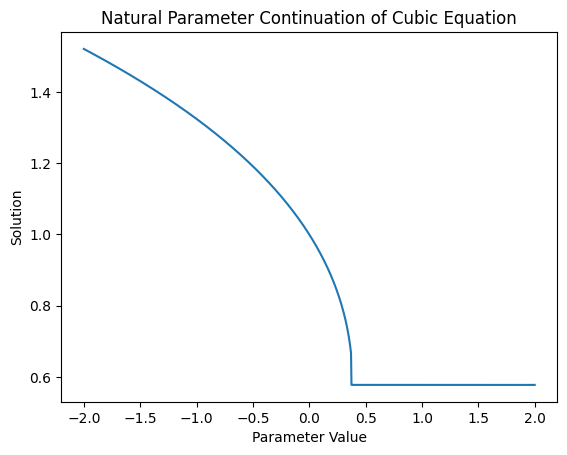

In [8]:
from NumericalContinuation import natural_continuation

cubic_results, pars = natural_continuation(cubic, 0, -2, 2, 1000)
fig, ax = plt.subplots()
plotter(-pars, -cubic_results, '-', 'Parameter Value', 'Solution', 'Natural Parameter Continuation of Cubic Equation', ax)

To demonstrate the use of a phase condition, the hopf bifurcation normal form can be solved. It is worth noting that I have plotted the negative set of points to highlight the symmetrical nature of the solution space and provide a more complete picture of the saddle-node bifurcation structure.

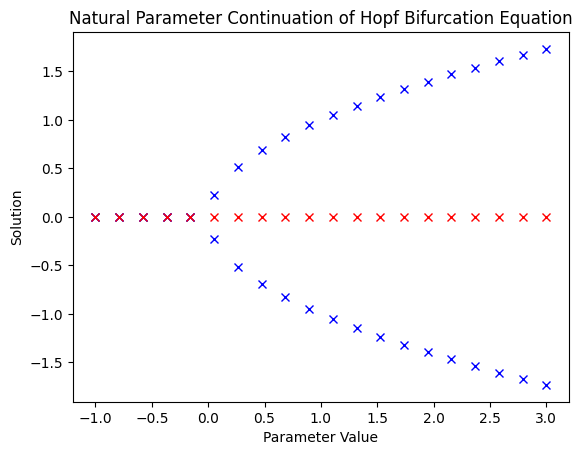

In [16]:
results, pars = natural_continuation(hopf_bif, [1.2, 1.0, 4], -1, 3, 20, standard_pc)

fig, ax = plt.subplots()
plotter(pars, results[:,0], 'bx', "Parameter Value", "Solution", "Natural Parameter Continuation of Hopf Bifurcation Equation", ax)
plotter(pars, -results[:,0], 'bx', "Parameter Value", "Solution", "Natural Parameter Continuation of Hopf Bifurcation Equation", ax)
plotter(pars, results[:,1], 'rx', "Parameter Value", "Solution", "Natural Parameter Continuation of Hopf Bifurcation Equation", ax)

Boundary Value Problem Solver
----------------------------
In this code, the `BVP_solver` is the only function the user interacts with. It's purpose is to solve boundary value problems using a finite difference grid. First, the `matrix_build` function creates a tridiagonal matrix representing a finite difference approximation to the Laplacian operator on a regular grid. The size of the matrix depends on the size of the inputted spacial domain.

There are also three different types of boundary conditions 'dirichlet', 'neumann' and 'robin'. These boundary conditions can be used interchangably. The source function can be an integer, dependant on x, or dependant on the solution at the previous time step. The `finite_grid` function constructs a finite grid returning a variety of useful values used for solving the linear algebra equation. The `Matrix_solver` function is used to solve a system of matrix equations. 

Since my source function can depend on the solution, an iterative solver function is also required. Although the iterative solver works in all cases, it is far more computationally expensive than using `Matrix_solver`. For this reason, my `BVP_solver` defaults to `Matrix_solver` unless explicitly told that the source term depends on the solution.

This code is designed to be very flexible. It's modularity means it can be easily set up to solve many different boundary value problems. The choice and placement of default arguments was also vital to ensure the code is reusable for different boundary value problems. The iterative solver also includes a tolerance parameter and a maximum number of iterations to control the convergence of the solution and ensure accuracy.

The following equation is used to test the matrix solver, it is being solved on the interval between 0 and 1, with Neumann boundary conditions.

\begin{equation}
\frac{d^2u}{dx^2} + 1 = 0
\end{equation}

To better visualise the accuracy of the matrix solver, the true solutions are plotted alongside the approximations. The solver demonstrates a high degree of accuracy.

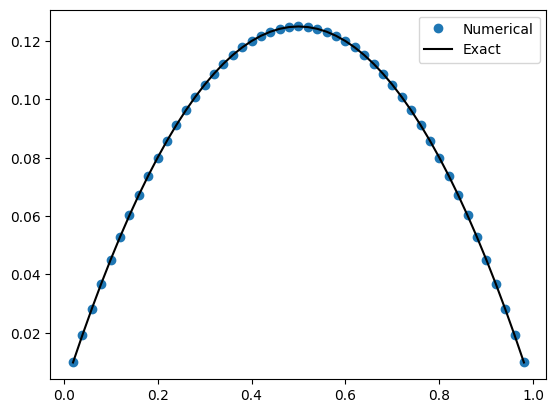

In [10]:
from BVPsolver import BVP_solver
x_ans2, x_int2 = BVP_solver(N=50, a=0, b=1, gamma1=0, gamma2=0, D=1, integer=1, source=True, boundary="neumann")
u_ans2 = BVP_true_answer(x_int2, a=0, b=1, alpha=0, beta=0, D=1, integer=1)

plt.plot(x_int2, x_ans2, 'o', label="Numerical")
plt.plot(x_int2, u_ans2, 'k', label='Exact')
plt.legend()
plt.show()

In the example below, the Bratu equation is solved with a source term dependant on the solution $(u)$ to demonstrate the iterative solver. Dirichlet boundary conditions are employed in this example. The second graph demonstrates the evolution of the equation with different boundary conditions.

\begin{equation}
3 \frac{d^2u}{dx^2} + e^{0.1 u x} = 0
\end{equation}

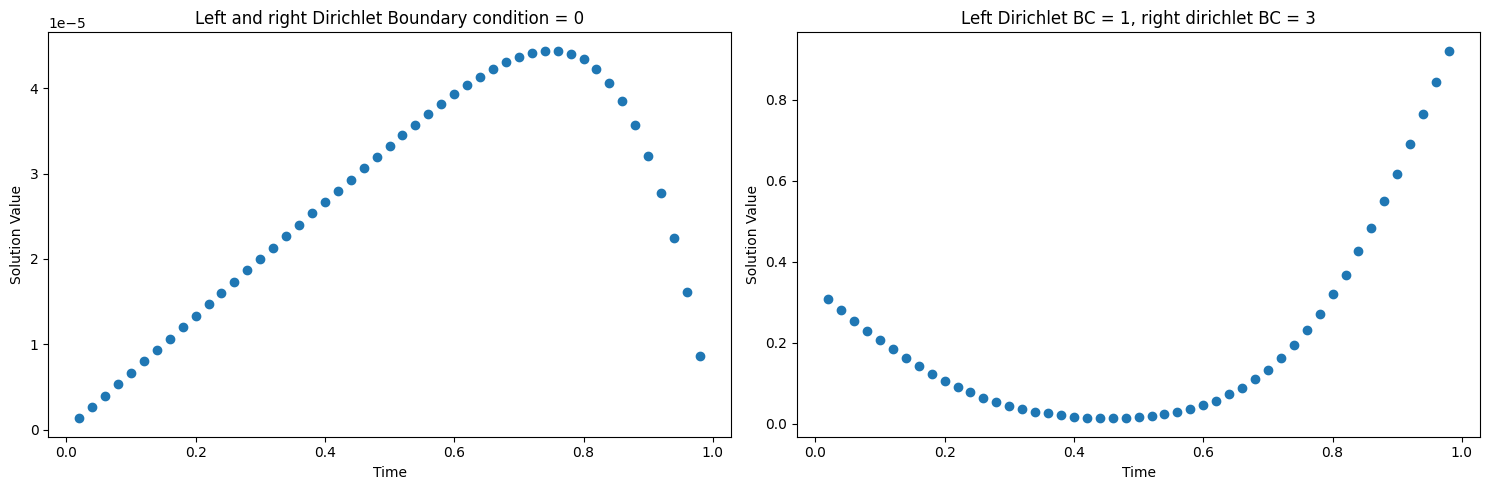

In [11]:
# Bratu Equation
x_ansbratu1, x_intbratu1 = BVP_solver(N=50, a=0, b=1, gamma1=0, gamma2=0, D=3, integer=0.1, source=True, boundary="dirichlet", x_dependant=True, u_dependant=True, tol=1e-6, max_iter=100)
x_ansbratu2, x_intbratu2 = BVP_solver(N=50, a=0, b=1, gamma1=1, gamma2=3, D=3, integer=0.1, source=True, boundary="dirichlet", x_dependant=True, u_dependant=True, tol=1e-6, max_iter=100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plotter(x_intbratu1, x_ansbratu1, 'o', 'Time', 'Solution Value', 'Left and right Dirichlet Boundary condition = 0', ax1)
plotter(x_intbratu2, x_ansbratu2, 'o', 'Time', 'Solution Value', 'Left Dirichlet BC = 1, right dirichlet BC = 3', ax2)
plt.tight_layout()
plt.show()

Partial Differential Equation Solver
------------------------------

The purpose of this software is to numerically solve partial differential equations (PDEs) using finite difference methods. These methods include: explicit euler, implicit euler, fourth order Runge-Kutta, and the Crank Nicholson method. 

The first step of the `PDE_solver` is to implement the `time_grid` function which generates the time and spatial grids for solving the PDE. Then, depending on the users selection, the method function takes nescessary parameters such as, boundary conditions, initial conditions, and discretisation parameters. The numerical solutions at each time step are calculated and returned as a numpy array. The array contains solutions to the PDE in all time instances in addition to x values, so takes the form of a nested array. These nested arrays are convenient for accessing solutions at specific time instances as they are easily indexed. The `animate_solution` function conveniently displays the evolution of the PDE solutions over time.

Similar to the BVP_solver, this function was built with the user in mind. It is designed to be simple to use and as modular as possible, such that it can solve a wide range of problems using different methods. The use of control flow statements was also vital in the construction of this code. The use of 'if', 'elif', 'else', and 'for' loops ensure code blocks are executed selectively based on specific conditions or iterations, improving effeciency, and providing greater control and flexibility in program logic. 

In the example below, the PDE is the linear diffusion equation without a source term and the chosen method is the RK4 solver.

\begin{equation}
\frac{\partial u}{\partial t} = 2\frac{\partial^2 u}{\partial x^2}
\end{equation}

The left and right boundary condtion are set equal to 0, and the initial condition is:

\begin{equation}
u(x,0)=sin \left(\frac{\pi(x-a)}{b-a} \right)
\end{equation}

In this case, the exact solution to the problem is also available and is contained within the `linear_diffusion_sol` function. The results of the RK4 method align almost identically with the true solution values.

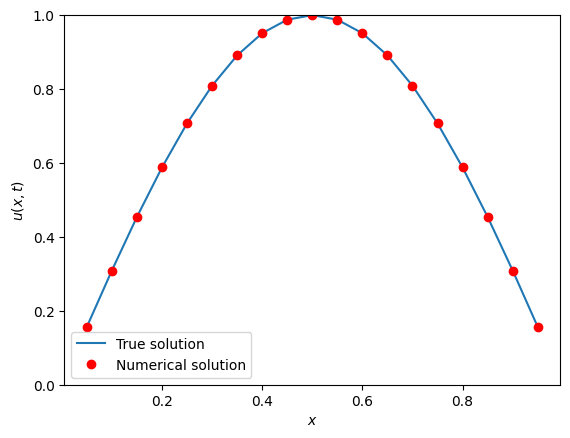

In [12]:
from PDEsolver import solve_PDE, linear_diffusion_sol, animate_solution

U_RK4, x_int = solve_PDE(method='RK4_method', N=20, D=2, gamma1=0, gamma2=0, a=0, b=1, IC=linear_diffusion_IC1)
u_true = linear_diffusion_sol(N=20, D=2, a=0, b=1)
animate_solution(U_RK4, u_true, x_int)

The implicit Euler and Crank-Nicholson methods are more stable than the explicit euler method and RK4 method. This is due to the implicit methods being more robust when working with a wide range boundary and initial conditions. Implicit methods are also less susceptible to numerical instabilities. These methods will be used on the linear diffusion equation below using 101 grid points with a timestep size of 0.1. The results are then plotted using the set of solutions when time is 2. 

\begin{equation}
\frac{\partial u}{\partial t} = 0.1\frac{\partial^2 u}{\partial x^2}
\end{equation}

The left and right boundary condtion are set equal to 0, and the initial condition is:

\begin{equation}
u(x,0)= sin(\pi x)
\end{equation}

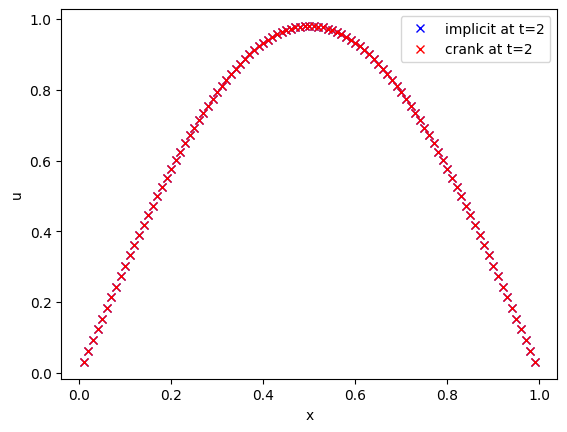

In [17]:
U_implicit, x_int = solve_PDE(method='implicit_euler', N=100, D=0.1, gamma1=0, gamma2=0, a=0, b=1, dt=0.1, IC=linear_diffusion_IC2)
U_crank, x_int = solve_PDE(method='crank', N=100, D=0.1, gamma1=0, gamma2=0, a=0, b=1, dt=0.1, IC=linear_diffusion_IC2)
plt.plot(x_int, U_implicit[2,:], 'bx', label='implicit at t=2')
plt.plot(x_int, U_crank[2,:], 'rx', label='crank at t=2')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.show()  

To obtain solutions at every x value, it is possible to interpolate the results from the implicit Euler and Crank-Nicholson methods. Using the interpolate library from scipy, and comparing the results to the true solution, the euler method is marginally more accurate when the time step size is 0.1. However, the implicit Euler accuracy decreases much more rapidly as the time step size increases as opposed to the crank nicholson method.

In [14]:
import scipy.interpolate

print('true sol = ', np.exp(-0.2*np.pi**2))
y_interp1 = scipy.interpolate.interp1d(U_implicit[2,:], x_int, kind='linear')
print('implicit euler = ', y_interp1(0.5))

y_interp2 = scipy.interpolate.interp1d(U_crank[2,:], x_int, kind='linear')
print('crank = ', y_interp2(0.5))

true sol =  0.13891113314280026
implicit euler =  0.19125964879327972
crank =  0.192458975137013


Reflective learning log
-----------------------
Prior to this project, I had no experience with numerical programming. I have used python to complete data science projects before but my code has always been basic and messy I did not make use of functions meaning none of the code was reusable. Whilst it was very challenging at first, making progress with this project was exciting, and I am glad I took this module because my coding skills have advanced dramatically. 

I learnt the importance of using modular functions to create reusable, effecient code that can be adapted to a wide range of applications. Furthermore, having seperate functions means debugging takes far less time than it did before, as it is easier to identify where errors are taking place. In addition to this, I learned the difference between keyword arguments and positional arguments to handle different types of input. I also learned how to set default arguments, which personally, is one of my favourite pieces of new knowledge. Default arguments make implementing code much faster, and make functions so much easier to use. 

My use of git has become second nature, before this project I thought github was complicated and pointless however I now see the benefits. I am able to track my progress and I do not risk permanently breaking the code when making changes as I can simply go back and check other versions. Using a repository has been essential for my organisation this project, it has allowed me to easily manage and organise my files. Importing functions from files I have created is also new to me. I will be using this often in future as it makes the code much neater and easier to follow. I have also used gitignore for the first time, to stop unwanted files, such as temp files, and build artifacts from cluttering folder.

I have tried to add comments and docstrings as I go with my code which has made it easier to understand and come back to. In particular, I have found that using docstrings has made the code less daunting to use, as it provides a concise summary of the function's purpose and usage. Additionally, I have constantly been thinking about the user's perspective, seeking ways to simplify and streamline the code, making it more user-friendly. The implementation of a readme with this project highlights my awareness of the user. 

ODEs and PDEs have always been an area of maths I struggled with and so whilst this project has been a challenge, I feel as though I understand these problems much more. I have gained further knowledge about how boundary value, and initial value problems are structured, and how they are solved. Using matrices and a finite difference approach was very intresting as I did not know these methods existed before-hand. I enjoyed learning about numerical shooting and love the idea that a boundary value problem can be treated as an initial value problem. 

In summary, I found this project extremely difficult but enjoyed every step of the challenge. I feel as though I have made a lot of progress with my programming and feel comfortable pursuing even larger projects. I have invested a lot of time into this project and hope this report demonstrates that. I think I will continue to work on this library for a while as there is definately more I can learn, and I have found coding in python to be satisfying when it all comes together. 